<a href="https://colab.research.google.com/github/jeel2420/Image-Denoising-using-AutoEncoders/blob/master/Image_Denoising_using_AutoEncoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Load dataset 
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


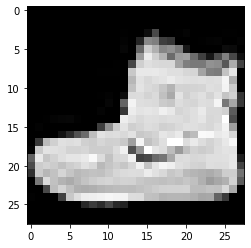

In [3]:
# Visualize a sample image
plt.imshow(X_train[0], cmap='gray')

In [4]:
# check out the shape of the training data
X_train.shape

(60000, 28, 28)

In [5]:
# check out the shape of the testing data
X_test.shape

(10000, 28, 28)

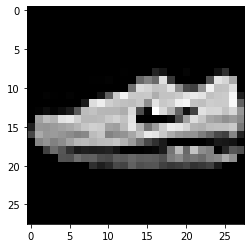

In [6]:
# Let's view some images!
i = random.randint(1, 60000)
plt.imshow(X_train[i], cmap='gray')

In [7]:
label = y_train[i]
label

7

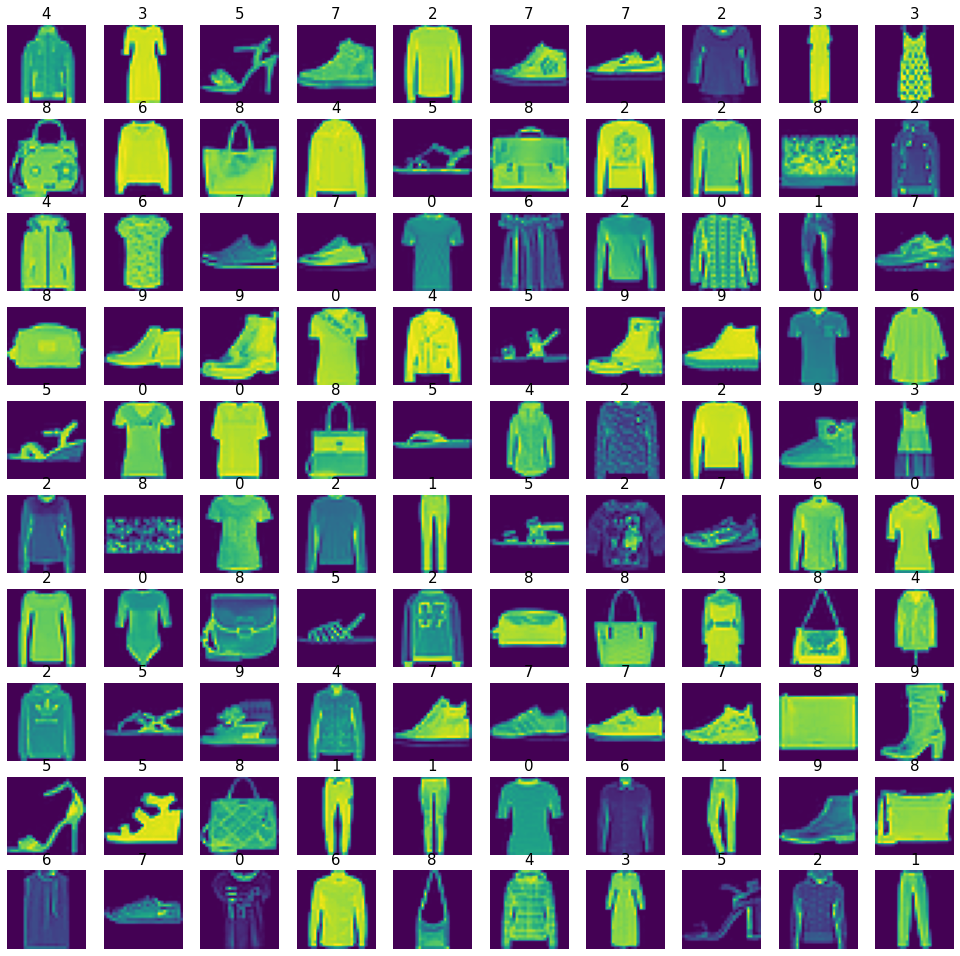

In [8]:
W_grid = 10
L_grid = 10

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train)

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize=15)
    axes[i].axis('off')


In [0]:
# normalize data
X_train = X_train/255
X_test = X_test/255

In [0]:
# add some noise
noise_factor = 0.3

noise_dataset = []

for image in X_train:
    noisy_image = image + noise_factor * np.random.randn(*image.shape)
    noisy_image = np.clip(noisy_image, 0, 1)
    noise_dataset.append(noisy_image)

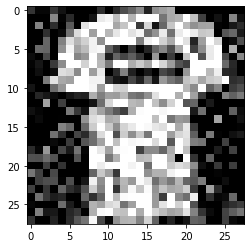

In [11]:
plt.imshow(noise_dataset[1], cmap='gray')

In [0]:
# add noise to testing dataset
noise_factor = 0.1

noise_test_dataset = []

for image in X_test:
    noisy_image = image + noise_factor * np.random.randn(*image.shape)
    noisy_image = np.clip(noisy_image, 0, 1)
    noise_test_dataset.append(noisy_image)

In [0]:
noise_dataset = np.array(noise_dataset)
noise_test_dataset = np.array(noise_test_dataset)

In [0]:
autoencoder = tf.keras.models.Sequential()

#encoder
autoencoder.add(tf.keras.layers.Conv2D(16, 3, strides = 2, padding = 'same', input_shape = (28,28,1)))
autoencoder.add(tf.keras.layers.Conv2D(8, 3, strides = 2, padding = 'same'))
autoencoder.add(tf.keras.layers.Conv2D(8, 3, strides = 1, padding = 'same'))

#decoder
autoencoder.add(tf.keras.layers.Conv2DTranspose(16, 3, strides = 2, padding = 'same'))
autoencoder.add(tf.keras.layers.Conv2DTranspose(1, 3, strides = 2, padding = 'same', activation = 'sigmoid'))


In [27]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [28]:
autoencoder.fit(noise_dataset.reshape(-1, 28, 28, 1),
               X_train.reshape(-1, 28, 28, 1),
               epochs = 10,
               batch_size = 200,
               validation_data = (noise_test_dataset.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1)))

Epoch 1/10
300/300 [==============================] - 1s 5ms/step - loss: 0.3973 - val_loss: 0.3159
Epoch 2/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3153 - val_loss: 0.3015
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3083 - val_loss: 0.2965
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3051 - val_loss: 0.2931
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3035 - val_loss: 0.2906
Epoch 6/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3025 - val_loss: 0.2911
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3019 - val_loss: 0.2897
Epoch 8/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3015 - val_loss: 0.2896
Epoch 9/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3011 - val_loss: 0.2883
Epoch 10/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3008 - val_loss: 0.2894

In [29]:
evaluation = autoencoder.evaluate(noise_test_dataset.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28 ,1))
print("Test Loss :",evaluation)

313/313 [==============================] - 1s 2ms/step - loss: 0.2894
Test Loss : 0.28941425681114197


In [0]:
predicted = autoencoder.predict(noise_test_dataset.reshape(-1, 28, 28, 1))

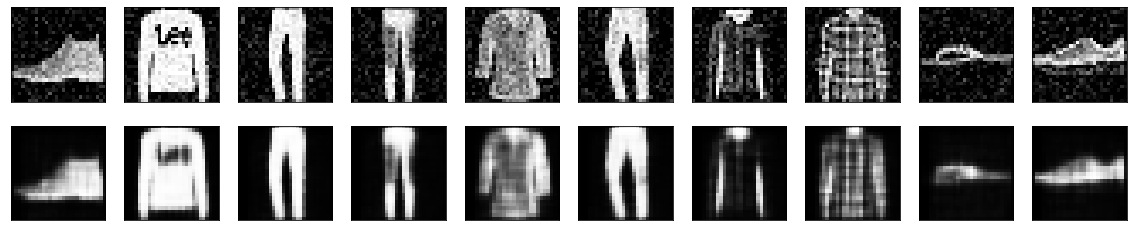

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([noise_test_dataset[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)